<a href="https://colab.research.google.com/github/claredavies/ArtificialIntelligience/blob/main/AIGroupAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
 !pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=a0802cccdd231d9478a39efdcc1b5f5c8b1cdef46f5fc24aa9d07e585347b0e9
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from google.colab import files
from itertools import product

# Read in data

In [3]:
uploaded = files.upload()
df = pd.read_csv('DatasetAI.csv', sep=';', delimiter=None, header='infer', names=None, index_col=None)

Saving DatasetAI.csv to DatasetAI.csv


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   x1,x2,y  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes
None


# Linguistic Labels

In [13]:
def createDF(range_values, k):
  label_list = []
  centroid_list = []
  start_list = []
  end_list = []

  for x in range(1, (k+1), 1):
    slot = (np.max(range_values) - np.min(range_values))/(k-1)
    start_centroid = np.min(range_values)
    if x == 0:
      start = 0
      centroid = start_centroid
      end = start + slot

    if x == k:
      centroid = np.max(range_values)
      end = k
      start = end - slot

    else:
      centroid = start_centroid + (x-1)*slot
      start = centroid - slot
      end = centroid + slot

    label_list.append(x)
    centroid_list.append(centroid)
    start_list.append(start)
    end_list.append(end)
  
  df = pd.DataFrame(list(zip(label_list, centroid_list, start_list, end_list)),
               columns =['label', 'centroid', 'start', 'end'])
  
  return df

In [14]:
x1 = np.arange(1, 6, 1)
# np.min(x1)
createDF(x1, 5)

,label,centroid,start,end
0,1,1.0,0.0,2.0
1,2,2.0,1.0,3.0
2,3,3.0,2.0,4.0
3,4,4.0,3.0,5.0
4,5,5.0,4.0,5.0


In [119]:
# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x1 = np.arange(1, 6, 1)
x2 = np.arange(1, 6, 1)
y  = np.arange(1, 6, 1)

# Generate fuzzy membership functions
# start point, y point, end point
x1_s_centroid = 1
x1_s = fuzz.trimf(x1, [0, x1_s_centroid, 2])
x1_ms_centroid = 2
x1_ms = fuzz.trimf(x1, [1, x1_ms_centroid, 3])
x1_m_centroid = 3
x1_m = fuzz.trimf(x1, [2, x1_m_centroid, 4])
x1_ml_centroid = 4
x1_ml = fuzz.trimf(x1, [3, x1_ml_centroid , 5])
x1_l_centroid = 5
x1_l = fuzz.trimf(x1, [4, x1_l_centroid, 5])

x2_s = fuzz.trimf(x2, [0, 1, 2])
x2_ms = fuzz.trimf(x2, [1, 2, 3])
x2_m = fuzz.trimf(x2, [2, 3, 4])
x2_ml = fuzz.trimf(x2, [3, 4 , 5])
x2_l = fuzz.trimf(x2, [4, 5, 5])

y_s = fuzz.trimf(y, [0, 1, 2])
y_ms = fuzz.trimf(y, [1, 2, 3])
y_m = fuzz.trimf(y, [2, 3, 4])
y_ml = fuzz.trimf(y, [3, 4 , 5])
y_l = fuzz.trimf(y, [4, 5, 5])

In [123]:
slot = (np.max(x1) - np.min(x1))/5
print(slot)

0.8


# Visualize these universes and membership functions

In [ ]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x1, x1_s, 'b', linewidth=1.5, label='s')
ax0.plot(x1, x1_ms, 'g', linewidth=1.5, label='ms')
ax0.plot(x1, x1_m, 'r', linewidth=1.5, label='m')
ax0.plot(x1, x1_ml, 'c', linewidth=1.5, label='ml')
ax0.plot(x1, x1_l, 'k', linewidth=1.5, label='l')
ax0.set_title('x1')
ax0.legend()


ax1.plot(x2, x2_s, 'b', linewidth=1.5, label='s')
ax1.plot(x2, x2_ms, 'g', linewidth=1.5, label='ms')
ax1.plot(x2, x2_m, 'r', linewidth=1.5, label='m')
ax1.plot(x2, x2_ml, 'c', linewidth=1.5, label='ml')
ax1.plot(x2, x2_l, 'k', linewidth=1.5, label='l')
ax1.set_title('x2')
ax1.legend()

ax2.plot(y, y_s, 'b', linewidth=1.5, label='s')
ax2.plot(y, y_ms, 'g', linewidth=1.5, label='ms')
ax2.plot(y, y_m, 'r', linewidth=1.5, label='m')
ax2.plot(y, y_ml, 'c', linewidth=1.5, label='ml')
ax2.plot(y, y_l, 'k', linewidth=1.5, label='l')
ax2.set_title('y')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [109]:
#create dataframe
df_x1 = pd.DataFrame()
df_x2 = pd.DataFrame()
df_y = pd.DataFrame()

In [115]:
print(df_x1.head())

Empty DataFrame
Columns: []
Index: []


# Create primary and secondary tables

In [54]:
data = [['s', 's'], ['ms', 'ms'], ['m', 'm'],['ml', 'ml'],['l', 'l']]
df = pd.DataFrame(data, columns=['x1', 'x2'])


In [55]:
print(df)

   x1  x2
0   s   s
1  ms  ms
2   m   m
3  ml  ml
4   l   l


Generate all combinations of the catergorical variables

In [56]:
# apply product method
result_list = list(product(df['x1'], df['x2']))

Turn combination list into dataframe and add y column

In [57]:
df = pd.DataFrame (result_list, columns = ['x1', 'x2'])
df["y"] = np.nan

Create primary and secondary tables

In [59]:
df_main = df.copy()
df_secondary = df.copy()

In [60]:
print(df_main)

    x1  x2   y
0    s   s NaN
1    s  ms NaN
2    s   m NaN
3    s  ml NaN
4    s   l NaN
5   ms   s NaN
6   ms  ms NaN
7   ms   m NaN
8   ms  ml NaN
9   ms   l NaN
10   m   s NaN
11   m  ms NaN
12   m   m NaN
13   m  ml NaN
14   m   l NaN
15  ml   s NaN
16  ml  ms NaN
17  ml   m NaN
18  ml  ml NaN
19  ml   l NaN
20   l   s NaN
21   l  ms NaN
22   l   m NaN
23   l  ml NaN
24   l   l NaN


# Fuzzy Rules

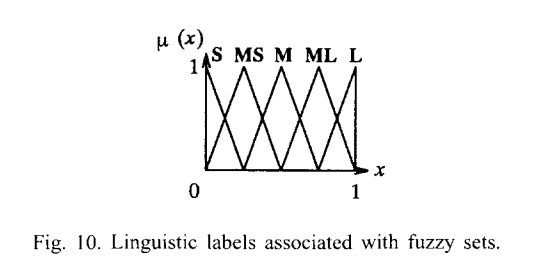

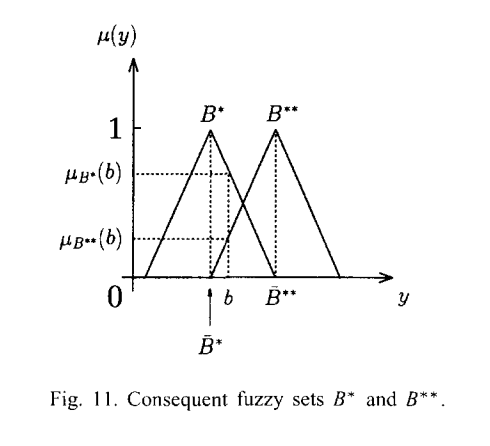